In [9]:
import os
import torch
import torchvision
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from models import SRCNN

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("retina")

In [6]:
TEST_IMAGE = "/Users/stefan/code/jpeg-deblock/BSDS500/BSDS500/data/images/train/35010.jpg"
MODEL_PATH = "models/SRCNN-v0.1.pt"

In [10]:
net = SRCNN()
net.load_state_dict(torch.load(MODEL_PATH))
net

SRCNN(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=same)
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=same)
)

In [14]:
def super_rescale(image):

    x = torchvision.transforms.ConvertImageDtype(torch.float32)(image)
    x = torch.unsqueeze(x, dim=0)
    y = net(x)[0]
    res = torchvision.transforms.ConvertImageDtype(torch.uint8)(y)
    return res

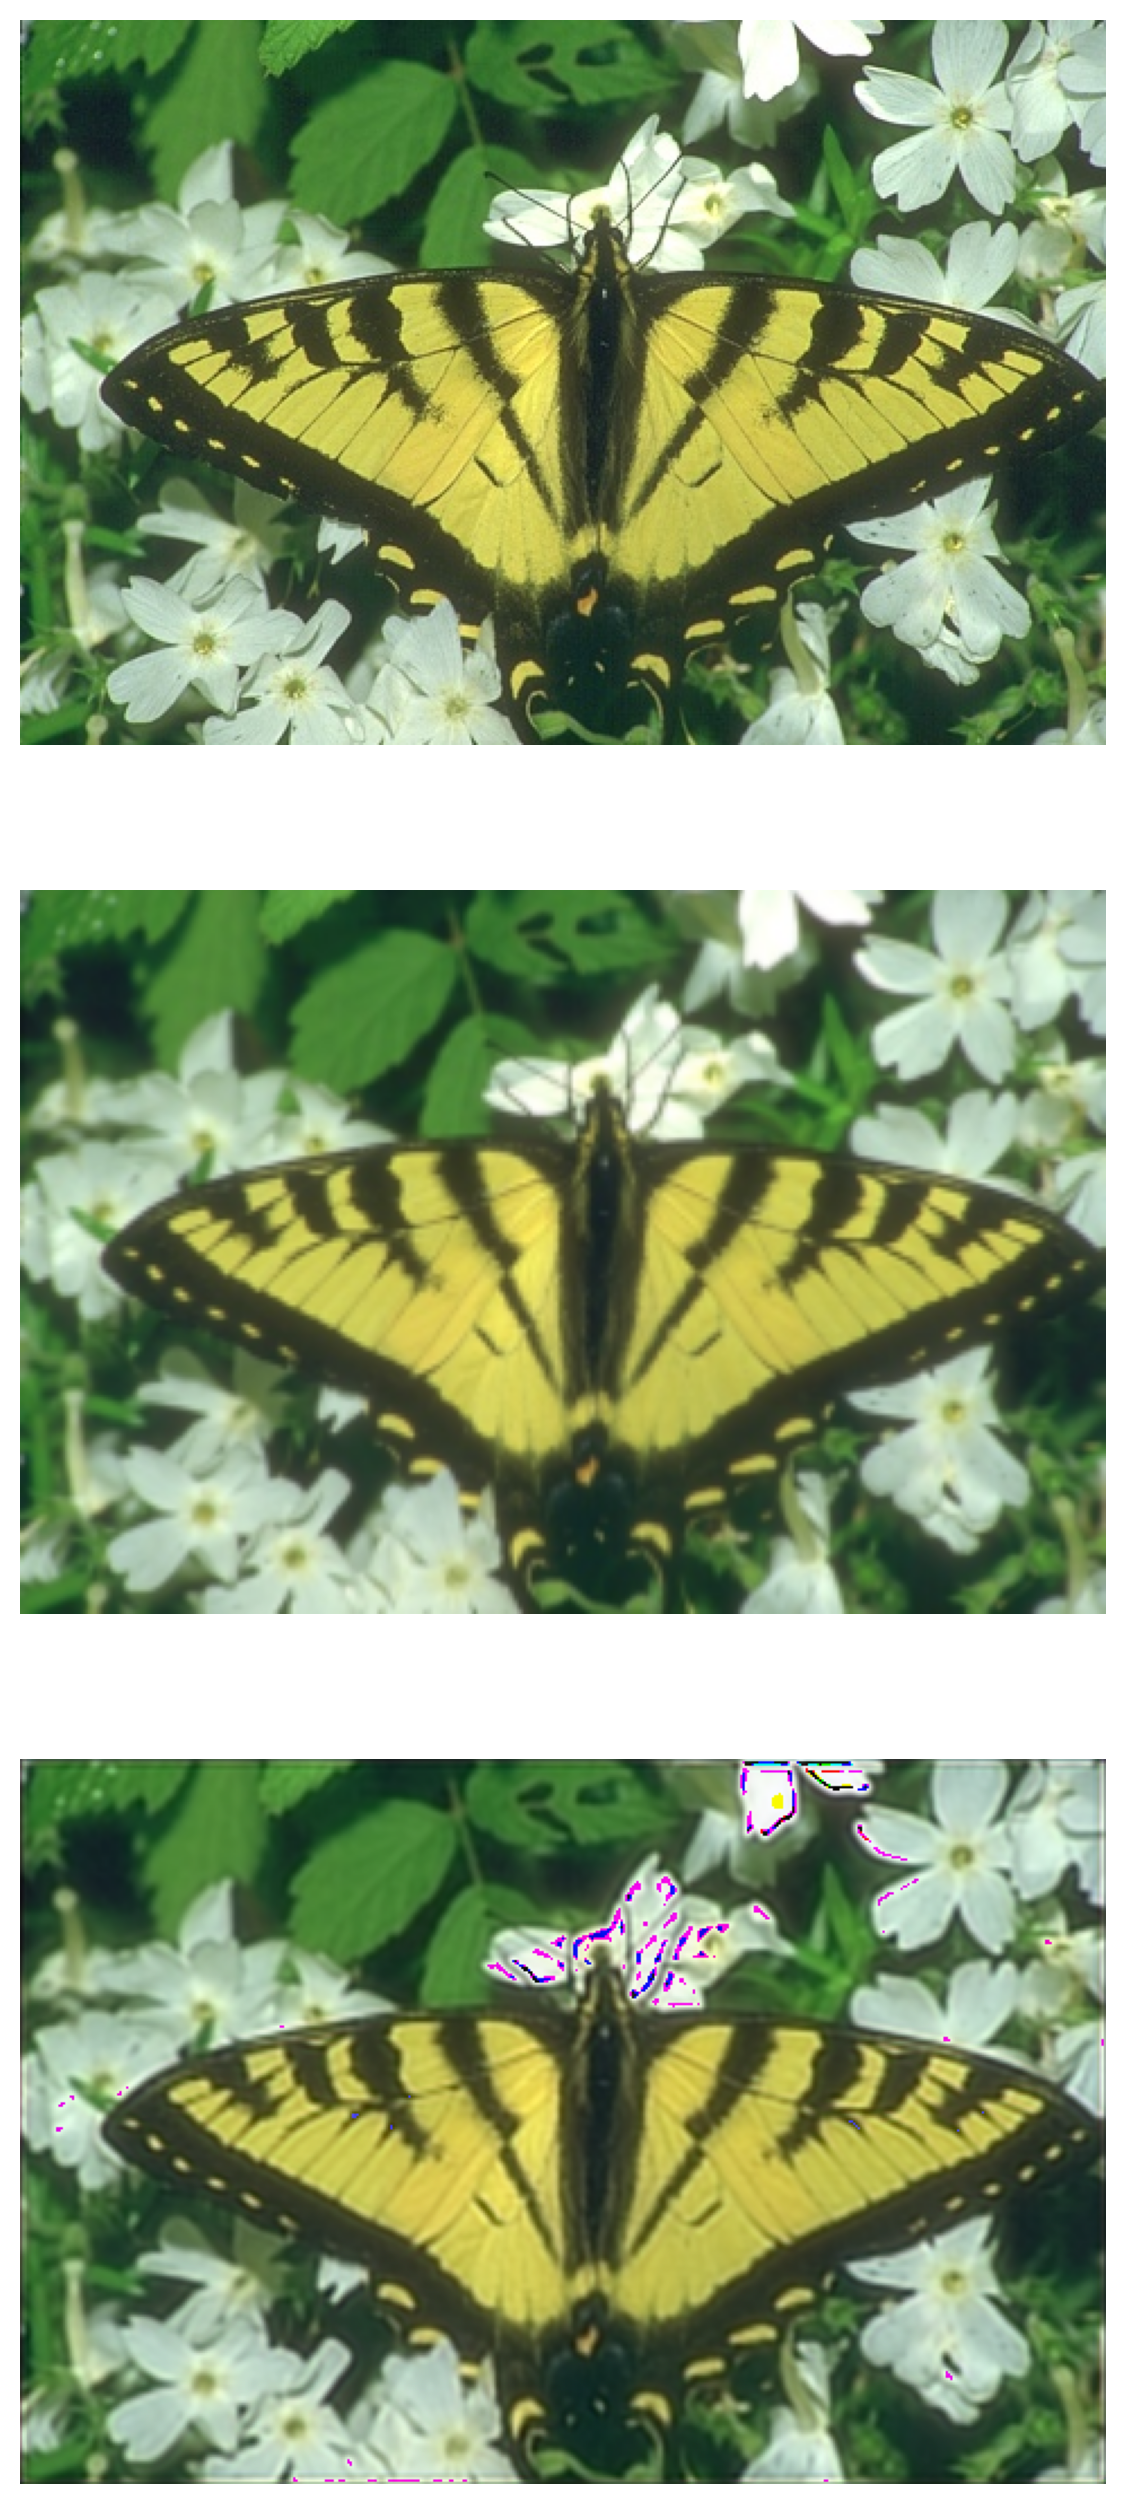

In [20]:
image = torchvision.io.read_image(TEST_IMAGE)

c, h, w = image.shape
downscale = torchvision.transforms.Resize(
    (h // 2, w // 2),
    interpolation=torchvision.transforms.InterpolationMode.BILINEAR)
upscale = torchvision.transforms.Resize(
    (h, w),
    interpolation=torchvision.transforms.InterpolationMode.BILINEAR)

bilinear = upscale(downscale(image)).permute(1,2,0).numpy()
superres = super_rescale(upscale(downscale(image))).permute(1,2,0).numpy()

fig, axs = plt.subplots(3, 1, figsize=(9, 16))
axs[0].imshow(image.permute(1,2,0).numpy())
axs[1].imshow(bilinear)
axs[2].imshow(superres)

for ax in axs:
    ax.set_axis_off()
